In [1]:
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch import optim
import torch

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics

import random
import math
from typing import Tuple, List, Sequence
import warnings

import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

matplotlib.rcParams['figure.figsize'] = (10, 5)

# Set random seed for reproducibility
seed = 42

random.seed(a=seed)
np.random.seed(seed=seed)
torch.manual_seed(seed=seed)

# Set compute device to GPU if available or CPU otherwise
device = ("cuda" if torch.cuda.is_available() else "cpu")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [3]:
xls = pd.ExcelFile('All10_VITS_new.xlsx')
number_of_sheets = len(xls.sheet_names)
number_of_sheets

def standardization(df, column_name):
    mean_value = df[column_name].mean()
    std_value = df[column_name].std()
    df[column_name] = (df[column_name] - mean_value) / std_value

# Apply standardization to 'Salary' column
vgy = []
for i in range(number_of_sheets):
    print(i)
    xls2 = pd.read_excel('All10_VITS_new.xlsx',sheet_name=i)
    print(xls2[0][0])
    print(xls2.columns)
    # progression = []
    # Dv = xls2['Round_New'].value_counts().to_dict()
    # asg = list(xls2['Round_New'].unique())
    # for i in asg:
    #   progression_percentage = [round(k / Dv[i] * 100, 2) for k in range(Dv[i])]
    #   progression.extend(progression_percentage)
    # xls2['Round_Progression'] = progression
    standardization(xls2, 1)
    standardization(xls2, 2)

    vgy.append(xls2)

0
CEO_2023_1011.png
Index([0, 1, 2, 'Round_Winner', 'Round', 'Match', 'Match_Round',
       'Round Progression'],
      dtype='object')
1
Combo Breaker 2022 - Super Street Fighter II Turbo Top 16 & Top 8_Cropped_resized_6551.png
Index([0, 1, 2, 'Round_Winner', 'Round', 'Match', 'Match_Round',
       'Round Progression'],
      dtype='object')
2
Street Fighter 2 Hyper Fighting Arcade tournament_Cropped_resized_Cropped_resized_1.png
Index([0, 1, 2, 'Round_Winner', 'Round', 'Match', 'Match_Round',
       'Round Progression'],
      dtype='object')
3
Super Street Fighter 2 Turbo Tournament @ BIG-ONE_361.png
Index([0, 1, 2, 'Round_Winner', 'Round', 'Match', 'Match_Round',
       'Round Progression'],
      dtype='object')
4
GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_1.png
Index([0, 1, 2, 'Round', 'Round_Winner', 'Match', 'Match_Round',
       'Round Progression'],
      dtype='object')
5
EVO 2022 - THE FIRST CRUSADE _ Super Street Fighter II Turbo Tournament_30511.

In [4]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.8 MB/s eta 0:00:00


In [5]:
import xlsxwriter
excel_file_path = 'Ultimate_sheets.xlsx'

# Create a Pandas Excel writer using ExcelWriter
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet
    for i, df in enumerate(vgy, start=1):
        sheet_name = f'Sheet_{i}'
        df.to_excel(writer, sheet_name=sheet_name, index=False)

writer.close()

/usr/local/lib/python3.10/dist-packages/xlsxwriter/workbook.py:369: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [6]:
# Define columns of interest
dfs = pd.read_excel("/content/Ultimate_sheets.xlsx", sheet_name=None) # We set sheet_name to None so that pd loads all sheets

# Add the sheet number to each dataframe
for key in dfs.keys():
    dfs[key]["Sheet"] = key

# Loaded sheets are stored in a dict, so we need to concat them
data = pd.concat(objs=dfs.values(), ignore_index=True)

# Show some statistics from the data
print(data.shape)

data = data[[0, 1, 2, 'Round', 'Round_Winner', "Round Progression", 'Sheet']]
# data['Player_1_Max'] = data['Player_1_Max'].ffill()
# data['Player_2_Max'] = data['Player_2_Max'].ffill()
print(data.isna().sum())

data.head()

(102576, 9)
0                    0
1                    0
2                    0
Round                0
Round_Winner         0
Round Progression    0
Sheet                0
dtype: int64


,0,1,2,Round,Round_Winner,Round Progression,Sheet
0,CEO_2023_1011.png,0.899427,0.832045,R1,Player_2,0.00000,Sheet_1
1,CEO_2023_1021.png,0.899427,0.832045,R1,Player_2,0.01325,Sheet_1
2,CEO_2023_1031.png,0.899427,0.780423,R1,Player_2,0.01987,Sheet_1
3,CEO_2023_1041.png,0.899427,0.780423,R1,Player_2,0.02649,Sheet_1
4,CEO_2023_1051.png,0.903862,0.776122,R1,Player_2,0.03311,Sheet_1


In [7]:
data.dropna(inplace = True)

In [8]:
data.isna().sum()

0                    0
1                    0
2                    0
Round                0
Round_Winner         0
Round Progression    0
Sheet                0
dtype: int64

In [9]:
data['Sheet'].unique()

array(['Sheet_1', 'Sheet_2', 'Sheet_3', 'Sheet_4', 'Sheet_5', 'Sheet_6',
       'Sheet_7', 'Sheet_8', 'Sheet_9', 'Sheet_10'], dtype=object)

In [10]:
cols_to_keep = [0, 1, 2, "Round",	"Round Progression", "Round_Winner", "Sheet"]

data = data[cols_to_keep]

# Check if there are any missing values
data.isna().sum()

0                    0
1                    0
2                    0
Round                0
Round Progression    0
Round_Winner         0
Sheet                0
dtype: int64

In [11]:
data = data.rename(columns={0: "Img", 1: "Player_1", 2: "Player_2"})
data

,Img,Player_1,Player_2,Round,Round Progression,Round_Winner,Sheet
0,CEO_2023_1011.png,0.899427,0.832045,R1,0.00000,Player_2,Sheet_1
1,CEO_2023_1021.png,0.899427,0.832045,R1,0.01325,Player_2,Sheet_1
2,CEO_2023_1031.png,0.899427,0.780423,R1,0.01987,Player_2,Sheet_1
3,CEO_2023_1041.png,0.899427,0.780423,R1,0.02649,Player_2,Sheet_1
4,CEO_2023_1051.png,0.903862,0.776122,R1,0.03311,Player_2,Sheet_1
...,...,...,...,...,...,...,...
102571,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,R3,0.97000,Player_2,Sheet_10
102572,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,R3,0.98000,Player_2,Sheet_10
102573,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,R3,0.99000,Player_2,Sheet_10
102574,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,R3,0.99000,Player_2,Sheet_10


In [12]:
data['Sheet'].unique()

array(['Sheet_1', 'Sheet_2', 'Sheet_3', 'Sheet_4', 'Sheet_5', 'Sheet_6',
       'Sheet_7', 'Sheet_8', 'Sheet_9', 'Sheet_10'], dtype=object)

In [13]:
data.loc[data['Round_Winner'] == 'Player_1', 'Round_Winner'] = 0
data.loc[data['Round_Winner'] == 'Player_2', 'Round_Winner'] = 1
data.loc[data['Round_Winner'] == 'Player 1', 'Round_Winner'] = 0
data.loc[data['Round_Winner'] == 'Player 2', 'Round_Winner'] = 1

data.loc[data['Round'] == 'R1', 'Round'] = 0
data.loc[data['Round'] == 'R2', 'Round'] = 1
data.loc[data['Round'] == 'R3', 'Round'] = 3

data

,Img,Player_1,Player_2,Round,Round Progression,Round_Winner,Sheet
0,CEO_2023_1011.png,0.899427,0.832045,0,0.00000,1,Sheet_1
1,CEO_2023_1021.png,0.899427,0.832045,0,0.01325,1,Sheet_1
2,CEO_2023_1031.png,0.899427,0.780423,0,0.01987,1,Sheet_1
3,CEO_2023_1041.png,0.899427,0.780423,0,0.02649,1,Sheet_1
4,CEO_2023_1051.png,0.903862,0.776122,0,0.03311,1,Sheet_1
...,...,...,...,...,...,...,...
102571,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.97000,1,Sheet_10
102572,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.98000,1,Sheet_10
102573,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.99000,1,Sheet_10
102574,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.99000,1,Sheet_10


In [14]:
!unzip '/content/drive/MyDrive/VIT/CEO 2023_ Day 2_Cropped_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Combo Breaker 2022 - Super Street Fighter II Turbo Top 16 & Top 8_Cropped_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Super Street Fighter II  2021_Cropped_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Super Street Fighter II X 2022_Cropped_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Super Street Fighter 2 Turbo Tournament @ BIG-ONE_Cropped_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Street Fighter 2 Hyper Fighting Arcade tournament_Cropped_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Frosty_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Makai_resized.zip'
!unzip '/content/drive/MyDrive/VIT/EVO_resized.zip'
!unzip '/content/drive/MyDrive/VIT/Genesis_resized.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_40991.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_41.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_41001.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_4101.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_41011.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_41021.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_41031.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street Fighter II X Top 8 Finals_41041.png  
  inflating: Genesis_resized/GENESIS X - LICENSE 2 SHILL _ Super Street F

In [15]:
# Using VIT to extract features from Image frame and converting it to a kist of length 768 features i.e each image has 768 features most important

import torch

from torch import nn

from torchvision.models.vision_transformer import vit_b_16
from torchvision.models import ViT_B_16_Weights

from PIL import Image as Image

vit = vit_b_16(weights=ViT_B_16_Weights.DEFAULT)

preprocessing = ViT_B_16_Weights.DEFAULT.transforms()

Dc = {}

count = 1
for dir in os.listdir('/content'):
  if dir == 'Genesis_resized' or dir == 'EVO_resized':
    print(dir)
    for file in os.listdir(dir):
      if file.endswith('.png'):
        try:
          img = Image.open(os.path.join(dir, file))

          img = preprocessing(img)

  # Add batch dimension
          img = img.unsqueeze(0)

          feats = vit._process_input(img)

  # Expand the CLS token to the full batch
          batch_class_token = vit.class_token.expand(img.shape[0], -1, -1)
          feats = torch.cat([batch_class_token, feats], dim=1)

          feats = vit.encoder(feats)

  # We're only interested in the representation of the CLS token that we appended at position 0
          feats = list(feats[:, 0].detach().numpy().flatten())
          print(file)
          print(type(feats))
          print(len(feats))
          Dc[file] = feats
          print(count)
        except:
          Dc[file] = np.nan
          print(count)
          pass
      count = count + 1

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
  6%|▌         | 19.5M/330M [00:02<00:34, 9.36MB/s]


KeyboardInterrupt: 

In [18]:
# import pickle

# with open('/content/drive/MyDrive/VIT/saved_dictionary_EVO_Genesis.pkl', 'wb') as f:
#     pickle.dump(Dc, f)

In [15]:
import pickle

with open('/content/drive/MyDrive/VIT/saved_dictionary_CEO_bigone.pkl', 'rb') as f:
    loaded_dict1 = pickle.load(f)

with open('/content/drive/MyDrive/VIT/saved_dictionary_2021-2022.pkl', 'rb') as f:
    loaded_dict2 = pickle.load(f)

with open('/content/drive/MyDrive/VIT/saved_dictionary_Makai_Frosty.pkl', 'rb') as f:
    loaded_dict3 = pickle.load(f)

with open('/content/drive/MyDrive/VIT/saved_dictionary_Combo_Hyper.pkl', 'rb') as f:
    loaded_dict4 = pickle.load(f)

with open('/content/drive/MyDrive/VIT/saved_dictionary_EV0_Genesis.pkl', 'rb') as f:
    loaded_dict5 = pickle.load(f)

In [16]:
loaded_dict4['Street Fighter 2 Hyper Fighting Arcade tournament_Cropped_resized_Cropped_resized_255211.png'] = [0]*768
loaded_dict4['Street Fighter 2 Hyper Fighting Arcade tournament_Cropped_resized_Cropped_resized_11021.png'] = [0]*768

In [17]:
Final1 = pd.DataFrame.from_dict(loaded_dict1, orient='index')
Final1['Img'] = Final1.index

Final2 = pd.DataFrame.from_dict(loaded_dict2, orient='index')
Final2['Img'] = Final2.index

Final3 = pd.DataFrame.from_dict(loaded_dict3, orient='index')
Final3['Img'] = Final3.index

Final4 = pd.DataFrame.from_dict(loaded_dict4, orient='index')
Final4['Img'] = Final4.index


Final5 = pd.DataFrame.from_dict(loaded_dict5, orient='index')
Final5['Img'] = Final5.index

In [18]:
Final = pd.concat([Final1, Final2, Final3, Final4, Final5])
Final

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Img
CEO_2023_37581.png,0.292202,-1.011914,0.175798,-0.609949,0.483664,-0.061908,0.259811,-0.396998,0.269450,0.233383,...,-0.011502,-0.131300,0.274927,0.658099,0.051076,0.141493,0.781891,-1.170140,-1.441865,CEO_2023_37581.png
CEO_2023_25181.png,0.014141,-0.881529,-0.344898,-0.707752,0.312587,0.316300,-0.164660,-0.571172,0.286550,0.912993,...,0.285080,0.068521,0.172687,-0.117972,-0.090101,-0.087467,0.954549,-1.679388,-1.441498,CEO_2023_25181.png
CEO_2023_97331.png,0.043980,-0.469428,0.650592,-0.207049,0.567874,-0.884709,0.519166,-0.774491,0.212732,0.505309,...,0.025677,-0.142016,-0.031511,0.211709,-0.421340,-0.074597,-1.033351,-0.497192,0.219806,CEO_2023_97331.png
CEO_2023_31511.png,-0.036737,-1.201613,-0.008785,-0.367045,0.400069,0.246471,0.159570,-0.271278,0.565594,1.385702,...,-0.105448,-0.399365,0.227896,-0.036977,-0.112798,-0.231450,0.629749,-1.352403,-1.240340,CEO_2023_31511.png
CEO_2023_142131.png,-0.532184,-1.204429,-0.257559,-0.327496,1.972310,0.025733,-0.495071,-0.767666,-0.274872,0.147517,...,-0.314693,-0.385232,0.191386,0.783995,0.907357,-0.081334,1.183249,-0.726539,-0.561110,CEO_2023_142131.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EVO 2022 - THE FIRST CRUSADE _ Super Street Fighter II Turbo Tournament_221151.png,0.514715,-1.407228,-0.312063,0.674449,0.681288,0.502000,-1.044173,-0.142613,0.316814,-1.290306,...,0.394278,-0.842176,-0.124202,-0.296692,-0.012788,0.538583,0.127777,-0.480588,-0.294014,EVO 2022 - THE FIRST CRUSADE _ Super Street Fi...
EVO 2022 - THE FIRST CRUSADE _ Super Street Fighter II Turbo Tournament_138081.png,0.301874,0.255977,-0.232886,-0.405528,0.473264,0.286166,-0.289229,-1.158295,0.154133,0.037062,...,0.391388,-0.424789,-0.195285,-0.847079,0.571684,0.387847,-1.210326,0.400476,0.196560,EVO 2022 - THE FIRST CRUSADE _ Super Street Fi...
EVO 2022 - THE FIRST CRUSADE _ Super Street Fighter II Turbo Tournament_49641.png,0.128042,-2.046790,-0.623241,0.423487,0.192972,-0.569791,0.090585,-1.019441,-0.821336,0.991057,...,-0.364512,-0.707790,0.503216,0.801655,0.009517,0.570464,-0.236330,-0.721277,-1.236861,EVO 2022 - THE FIRST CRUSADE _ Super Street Fi...
EVO 2022 - THE FIRST CRUSADE _ Super Street Fighter II Turbo Tournament_38411.png,-0.283067,-1.618636,-1.219947,-0.024364,0.357616,0.801438,0.202218,0.068047,-1.038600,-0.470790,...,0.132992,-0.188280,-0.068350,-0.648742,-0.271305,0.106449,-1.668305,-0.069994,-1.185424,EVO 2022 - THE FIRST CRUSADE _ Super Street Fi...


In [19]:
Fin = pd.merge(data, Final, left_on = 'Img', right_on = 'Img', how = 'inner')
Fin['Sheet'].unique()

array(['Sheet_1', 'Sheet_2', 'Sheet_3', 'Sheet_4', 'Sheet_5', 'Sheet_6',
       'Sheet_7', 'Sheet_8', 'Sheet_9', 'Sheet_10'], dtype=object)

In [20]:
col_list= [i for i in range(768)]

# Get sum of specific columns for each row
Fin['VIT'] = Fin[col_list].sum(axis=1)

Fin =Fin[['Img','Player_1','Player_2','Round','Round Progression','Sheet','VIT','Round_Winner']]
Fin

,Img,Player_1,Player_2,Round,Round Progression,Sheet,VIT,Round_Winner
0,CEO_2023_1011.png,0.899427,0.832045,0,0.00000,Sheet_1,0.847381,1
1,CEO_2023_1021.png,0.899427,0.832045,0,0.01325,Sheet_1,0.651975,1
2,CEO_2023_1031.png,0.899427,0.780423,0,0.01987,Sheet_1,1.728542,1
3,CEO_2023_1041.png,0.899427,0.780423,0,0.02649,Sheet_1,3.687731,1
4,CEO_2023_1051.png,0.903862,0.776122,0,0.03311,Sheet_1,4.302014,1
...,...,...,...,...,...,...,...,...
102081,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.97000,Sheet_10,-4.553786,1
102082,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.98000,Sheet_10,-4.877787,1
102083,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.99000,Sheet_10,-2.794303,1
102084,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.99000,Sheet_10,-4.495546,1


In [21]:
round_start_idx = np.where(Fin["Round Progression"] == 0.00)[0]

# Add the length of the dataset as the last index
# so that we can properly iterate over all rounds
round_start_idx = np.append(arr=round_start_idx, values=data.shape[0])
round_start_idx = round_start_idx[:-1]
round_start_idx

array([     0,    151,    224,    388,    498,    565,    729,    804,
          841,    951,   1077,   1169,   1255,   1320,   1409,   1504,
         1583,   1669,   1764,   1893,   1992,   2053,   2172,   2260,
         2375,   2490,   2561,   2655,   2731,   2826,   2936,   3018,
         3117,   3397,   3513,   3577,   3716,   3876,   3935,   4064,
         4236,   4332,   4479,   4536,   4693,   4855,   5001,   5046,
         5151,   5321,   5407,   5513,   5696,   5818,   5882,   5935,
         6114,   6149,   6304,   6485,   6548,   6642,   6739,   6822,
         6903,   6974,   7109,   7198,   7306,   7383,   7519,   7661,
         7763,   7835,   7972,   8065,   8163,   8258,   8355,   8451,
         8547,   8645,   8733,   8803,   8902,   8956,   9072,   9193,
         9345,   9442,   9504,   9608,   9701,   9797,   9881,   9936,
        10066,  10187,  10279,  10425,  10522,  10639,  10744,  10827,
        10927,  11003,  11122,  11218,  11368,  11454,  11586,  11677,
      

In [22]:
Final = Fin.copy()
Final['Round_Winner'] = Fin['Round_Winner'].astype(int)
Final

,Img,Player_1,Player_2,Round,Round Progression,Sheet,VIT,Round_Winner
0,CEO_2023_1011.png,0.899427,0.832045,0,0.00000,Sheet_1,0.847381,1
1,CEO_2023_1021.png,0.899427,0.832045,0,0.01325,Sheet_1,0.651975,1
2,CEO_2023_1031.png,0.899427,0.780423,0,0.01987,Sheet_1,1.728542,1
3,CEO_2023_1041.png,0.899427,0.780423,0,0.02649,Sheet_1,3.687731,1
4,CEO_2023_1051.png,0.903862,0.776122,0,0.03311,Sheet_1,4.302014,1
...,...,...,...,...,...,...,...,...
102081,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.97000,Sheet_10,-4.553786,1
102082,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.98000,Sheet_10,-4.877787,1
102083,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.99000,Sheet_10,-2.794303,1
102084,Frosty Faustings XV 2023 - Super Street Fighte...,-1.647823,-1.061525,3,0.99000,Sheet_10,-4.495546,1


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [27]:
# Finals = Finals.iloc[:,:-1]
# Finals.columns = Finals.columns.astype(str)
# Finals

# tsne_data.T

# model = TSNE(n_components = 2, random_state = 0)
# # configuring the parameters
# # the number of components = 2
# # default perplexity = 30
# # default learning rate = 200
# # default Maximum number of iterations
# # for the optimization = 1000

# tsne_data = model.fit_transform(Finals)
# import seaborn as sn

# # creating a new data frame which
# # help us in plotting the result data
# tsne_data = np.vstack((tsne_data.T, list(Final['Round_Winner']))).T
# tsne_df = pd.DataFrame(data = tsne_data,
#      columns =("Dim_1", "Dim_2", "label"))

# # Plotting the result of tsne
# sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
#                hue='label', palette="bright")
# plt.show()

In [24]:
Final = Final[['Player_1', 'Player_2', 'Round', 'Round Progression', 'Sheet','VIT', 'Round_Winner']]
Final.isna().sum()

Player_1             0
Player_2             0
Round                0
Round Progression    0
Sheet                0
VIT                  0
Round_Winner         0
dtype: int64

In [39]:
Final.to_excel('Final_VIT.xlsx', index = False)

In [25]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import warnings
from typing import Tuple, List
from sklearn import metrics

def get_round_slices(
        data: pd.DataFrame,
        round_frac: float) -> Tuple[
            List[np.ndarray],
            List[int],
            List[List[int]],
            int,
            List[str]
        ]:
    assert 0.0 <= round_frac <= 1.0, "Percentage must be in the interval [0.0, 1.0]."

    if round_frac == 1.0:
        warnings.warn("Current fraction of timesteps per round to be retained is 1.0, or 100%. "
                      "This represents a high risk of data leakage.")

    data_points, targets, idx_for_std, sheets = [], [], [], []
    max_seq_len = 0
    #round_start_idx = data['Round'].ne(data['Round'].shift()).cumsum()

    for i in range(1, len(round_start_idx.unique()) + 1):
        curr_round_start = round_start_idx[round_start_idx == i].index[0]
        next_round_start = round_start_idx[round_start_idx == i + 1].index[0] if i < len(round_start_idx.unique()) else len(data)

        curr_round_len = next_round_start - curr_round_start
        seq_len = max(1, round(curr_round_len * round_frac))
        max_seq_len = max(max_seq_len, seq_len)

        seq_end = curr_round_start + seq_len
        current_data = data.iloc[curr_round_start:seq_end].drop(["Round_Winner", "Sheet"], axis=1).to_numpy()

        if current_data.shape[0] > 0:
            data_points.append(current_data)
            sheets.append(data.iloc[curr_round_start]["Sheet"])
            targets.append(data.iloc[curr_round_start]["Round_Winner"])
            idx_for_std.append(np.arange(curr_round_start, seq_end))

    return data_points, targets, idx_for_std, max_seq_len, sheets

class RoundDataset(Dataset):
    def __init__(
            self,
            data: List[np.ndarray],
            labels: List[int],
            means: Tuple[float, float],
            stds: Tuple[float, float],
            max_seq_len: int):
        self.data = data
        self.means = means
        self.stds = stds
        self.labels = labels
        self.max_seq_len = max_seq_len

    def __len__(self):
        return len(self.data)

    def __getitem__(
            self,
            idx: int) -> Tuple[np.ndarray, float, int]:
        data = self.data[idx].copy()
        data[:, 0] = (data[:, 0] - self.means[0]) / self.stds[0]
        data[:, 1] = (data[:, 1] - self.means[1]) / self.stds[1]

        seq_len = data.shape[0]
        assert seq_len > 0, f"Sequence length is 0 for index {idx}"

        data = np.pad(
            array=data,
            pad_width=((0, self.max_seq_len - seq_len), (0, 0)),
            constant_values=0).astype(np.float32)

        label = np.float32(self.labels[idx])

        return data, label, seq_len

class LSTMModel(nn.Module):
    def __init__(
        self,
        in_dim: int = 2,
        hidden_dim: int = 512,
        bidirectional: bool = False,
        dropout: float = 0.25,
        n_layers: int = 5,
    ):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(
            input_size=in_dim,
            num_layers=n_layers,
            hidden_size=hidden_dim,
            batch_first=True,
            dropout=dropout,
            bidirectional=bidirectional,
        )

        self.bidirectional = bidirectional
        lstm_out_dim = hidden_dim * (2 if bidirectional else 1)

        self.dense_1 = nn.Linear(lstm_out_dim, 512)
        self.bn_1 = nn.BatchNorm1d(512)
        self.dense_2 = nn.Linear(512, 128)
        self.bn_2 = nn.BatchNorm1d(128)
        self.dense_3 = nn.Linear(128, 64)
        self.bn_3 = nn.BatchNorm1d(64)
        self.classifier = nn.Linear(64, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if 'weight' in name:
                    nn.init.xavier_uniform_(param)
                elif 'bias' in name:
                    nn.init.constant_(param, 0)

    def forward(
        self,
        x: torch.Tensor,
        seq_lens: torch.Tensor,
        pack_sequences: bool = True,
    ) -> torch.Tensor:
        if pack_sequences:
            non_zero_idx = seq_lens > 0
            x = x[non_zero_idx]
            seq_lens = seq_lens[non_zero_idx]

            x = nn.utils.rnn.pack_padded_sequence(
                input=x, lengths=seq_lens, batch_first=True, enforce_sorted=False
            )

        out, _ = self.lstm(x)

        if pack_sequences:
            out, _ = nn.utils.rnn.pad_packed_sequence(
                sequence=out, batch_first=True
            )

        out = self.dropout(out)
        out = torch.mean(out, dim=1)

        out = self.dense_1(out)
        out = self.bn_1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.dense_2(out)
        out = self.bn_2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.dense_3(out)
        out = self.bn_3(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.classifier(out)

        return out

def train_step(
        model: nn.Module,
        optimizer: torch.optim.Optimizer,
        loss_fn: nn.Module,
        inputs: torch.Tensor,
        targets: torch.Tensor,
        device: torch.device,
        **kwargs) -> Tuple[torch.Tensor, torch.Tensor]:
    optimizer.zero_grad()
    outs = model(x=inputs.to(device), **kwargs)
    loss = loss_fn(input=outs.cpu(), target=targets.unsqueeze(1))
    loss.backward()
    optimizer.step()
    return outs.cpu().detach(), loss

def val_or_test_step(
                model: nn.Module,
                loss_fn: nn.Module,
                inputs: torch.Tensor,
                targets: torch.Tensor,
                device: torch.device,
                **kwargs) -> Tuple[torch.Tensor, torch.Tensor]:
    with torch.no_grad():
        outs = model(x=inputs.to(device), **kwargs)
        loss = loss_fn(input=outs.cpu(), target=targets.unsqueeze(1))
    return outs.cpu().detach(), loss

def train_epoch(
        model: nn.Module,
        optimizer: torch.optim.Optimizer,
        loss_fn: nn.Module,
        train_dl: DataLoader,
        val_dl: DataLoader,
        device: torch.device) -> Tuple[
            Tuple[torch.Tensor, torch.Tensor, torch.Tensor],
            Tuple[torch.Tensor, torch.Tensor, torch.Tensor],
            nn.Module
            ]:
    train_epoch_preds, train_epoch_targets = [], []
    val_epoch_preds, val_epoch_targets = [], []
    running_loss = 0.0

    model.train()
    for i, (inputs, targets, seq_lens) in enumerate(train_dl):
        assert all(seq_len > 0 for seq_len in seq_lens), f"Found sequence length <= 0 in batch {i}"
        train_preds, loss = train_step(
            model, optimizer, loss_fn, inputs, targets, device,
            seq_lens=seq_lens, pack_sequences=True)
        train_epoch_preds.append(train_preds)
        train_epoch_targets.append(targets)
        running_loss += loss.item()

    train_epoch_preds = torch.cat(train_epoch_preds)
    train_epoch_targets = torch.cat(train_epoch_targets)
    train_loss = running_loss / (i + 1)

    running_loss = 0.0
    model.eval()
    for i, (inputs, targets, seq_lens) in enumerate(val_dl):
        val_preds, loss = val_or_test_step(
            model, loss_fn, inputs, targets, device,
            seq_lens=seq_lens, pack_sequences=True)
        val_epoch_preds.append(val_preds)
        val_epoch_targets.append(targets)
        running_loss += loss.item()

    val_epoch_preds = torch.cat(val_epoch_preds)
    val_epoch_targets = torch.cat(val_epoch_targets)
    val_loss = running_loss / (i + 1)

    train_outs = (train_epoch_preds, train_epoch_targets, train_loss)
    val_outs = (val_epoch_preds, val_epoch_targets, val_loss)

    return (train_outs, val_outs, model)


In [31]:
# import torch

# from torch import nn

# from torchvision.models.vision_transformer import vit_b_16
# from torchvision.models import ViT_B_16_Weights

# from PIL import Image as Image

# from extractor import ViTExtractor
# extractor = ViTExtractor()
# # imgs should be imagenet normalized tensors. shape BxCxHxW
# descriptors = extractor.extract_descriptors(imgs)

In [26]:
def get_round_slices(
        data: pd.DataFrame,
        round_frac: float) -> Tuple[
            List[np.ndarray],
            List[List[int]],
            np.ndarray[int],
            int,
            List[str]
        ]:
    """
    Get slices of rounds from data along with the label for the winner. For each round,
    a certain number of the initial data points is obtained, specified
    by round_frac. Indices of obtained rounds are kept for standardization purposes.
    Sheets are stored as well to simplify splitting into training, validation, and test sets later.

    Args:
        data (pd.DataFrame):
            DataFrame object to obtain round data points from.
        round_frac (float):
            The initial fraction of the rounds to obtain.

    Returns:
        (data_points, labels, idx_for_std, max_seq_len, sheets) (Tuple[List[np.ndarray], List[int], np.array[int], int, List[str]]):
            Sliced data points, labels, indices of selected data points, the maximum sequence length
            encountered in the data, and the sheet numbers for each round.
    """

    assert 0.0 <= round_frac <= 1.0, "Percentage must be in the interval [0.0, 1.0]."

    if round_frac == 1.0:
        warnings.warn(message="""Current fraction of timesteps per round to be retained is 1.0, or 100%.
                      This represents a high risk of data leakage as the model will have direct access
                      to the outcome of each round. Consider lowering the percentage.
                      """)

    # Lists for storing data points for rounds and targets
    data_points = []
    targets = []

    # Variable for keeping track of the longest sequence
    max_seq_len = 0

    # List for keeping track of indices
    # that will be kept for training.
    # This will be used to standardize the data later
    idx_for_std = []

    # List for keeping track of sheets
    sheets = []

    # Dict for mapping player names to integers
    player_mapping = {"Player_1": 0, "Player_2": 1}

    # Iterate over each round
    for i in range(1, len(round_start_idx)):
        # Get the start indices of the current and next round
        curr_round_start = round_start_idx[i - 1]
        next_round_start = round_start_idx[i]

        # Compute length of current round
        curr_round_len = next_round_start - curr_round_start

        # Get the ending index for chosen fraction of data points
        # and store it if it's longer than max_seq_len
        seq_len = round(curr_round_len * round_frac)

        if seq_len > max_seq_len:
            max_seq_len = seq_len

        # Store data points for current sequence.
        # Only damage-related columns are kept
        seq_end = curr_round_start + seq_len
        data_points.append(
            data.iloc[curr_round_start:seq_end].drop(
            [ "Round_Winner", "Sheet"], axis=1).to_numpy())

        # Obtain and store the sheet number for current round
        sheet = data.iloc[curr_round_start]["Sheet"]
        sheets.append(sheet)

        # Obtain the winner of the current round
        # and map them to an integer target
        winner = data.iloc[curr_round_start]["Round_Winner"]
        targets.append(winner)

        # Keep the indices of selected data points for current round
        indices = np.arange(curr_round_start, curr_round_start + seq_len)
        idx_for_std.append(indices)

    return data_points, targets, idx_for_std, max_seq_len, sheets

def compute_label_proportions(labels: List[int]) -> np.ndarray:
    """
    Compute label proportions from provided label list.

    Args:
        labels (List[int]):
            Integer labels in a list.

    Returns:
        label_counts (np.ndarray):
            A NumPy array containing the percentages of each label
            stored at the index corresponding to the label.
    """

    label_counts = np.unique(labels, return_counts=True)[1] # Return value is a tuple, we need the second element with value counts
    label_counts = label_counts/label_counts.sum() # Divide value counts by total

    return label_counts

class RoundDataset(Dataset):
    def __init__(
            self,
            data: List[np.ndarray],
            labels: List[int],
            means: Tuple[float, float],
            stds: Tuple[float, float],
            max_seq_len: int):
        """
        Dataset for Street Fighter matches.

        Args:
            data (List[np.ndarray]):
                List containing unpadded NumPy arrays of varying lengths,
                each representing a separate game round.
            labels (List[int]):
                The labels for the game matches in data.
            means (Tuple[float, float]):
                A tuple containing the means of each feature in data.
            std (Tuple[float, float]):
                A tuple containing the standard deviations of each feature in data.
            max_seq_len (int):
                The maximum sequence length in the data
                that all data points should be padded to.
        """
        super(RoundDataset, self).__init__()
        self.data = data
        self.means = means
        self.stds = stds
        self.labels = labels
        self.max_seq_len = max_seq_len

    def __len__(self):
        return len(self.data)

    def __getitem__(
            self,
            idx: int) -> Tuple[np.ndarray, float, np.ndarray]:
        """
        Obtain a single sample from the dataset.

        Args:
            idx (int):
                The index of the sample to obtain:

        Returns:
            (data, label, seq_len) (Tuple[np.ndarray, float, int]):
                The padded sample, the corresponding label, and the length of the sequence before padding.
        """

        # Obtain sample, standardize it, and then pad it
        data = self.data[idx].copy()
        data[:, 0] = (data[:, 0] - self.means[0]) / self.stds[0]
        data[:, 1] = (data[:, 1] - self.means[1]) / self.stds[1]

        seq_len = data.shape[0]
        data = np.pad(
            array=data,
            pad_width=((0, self.max_seq_len - seq_len), (0, 0)), # Pad axis 0, which corresponds to the time step dimension
            constant_values=0).astype(np.float32) # Fill -1 as padding

        # Obtain label as float32
        label = np.float32(self.labels[idx])

        return data, label, seq_len









import torch.nn as nn
import torch.nn.functional as F

class LSTMModel(nn.Module):
    def __init__(
        self,
        in_dim: int = 4,
        hidden_dim: int = 512,  # Reduced from 1024
        bidirectional: bool = False,
        dropout: float = 0.25,  # Increased from 0.3
        n_layers: int = 5,  # Reduced from 3
    ):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(
            input_size=in_dim,
            num_layers=n_layers,
            hidden_size=hidden_dim,
            batch_first=True,
            dropout=dropout,
            bidirectional=bidirectional,
        )

        self.bidirectional = bidirectional
        lstm_out_dim = hidden_dim * (2 if bidirectional else 1)

        self.dense_1 = nn.Linear(lstm_out_dim, 512)  # Reduced from 1024
        self.bn_1 = nn.BatchNorm1d(512)
        self.dense_2 = nn.Linear(512, 128)
        self.bn_2 = nn.BatchNorm1d(128)
        self.dense_3 = nn.Linear(128, 64)  # Added an extra layer
        self.bn_3 = nn.BatchNorm1d(64)
        self.classifier = nn.Linear(64, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # Weight initialization
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if 'weight' in name:
                    nn.init.xavier_uniform_(param)
                elif 'bias' in name:
                    nn.init.constant_(param, 0)

    def forward(
        self,
        x: torch.Tensor,
        seq_lens: torch.Tensor,
        pack_sequences: bool = True,
    ) -> torch.Tensor:
        if pack_sequences:
            x = nn.utils.rnn.pack_padded_sequence(
                input=x, lengths=seq_lens, batch_first=True, enforce_sorted=False
            )

        out, _ = self.lstm(x)

        if pack_sequences:
            out, _ = nn.utils.rnn.pad_packed_sequence(
                sequence=out, batch_first=True
            )

        out = self.dropout(out)
        out = torch.mean(out, dim=1)  # Average over time steps

        out = self.dense_1(out)
        out = self.bn_1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.dense_2(out)
        out = self.bn_2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.dense_3(out)
        out = self.bn_3(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.classifier(out)

        return out
def train_step(
        inputs: torch.Tensor,
        targets: torch.Tensor,
        **kwargs) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    Training step with gradient update on a batch of inputs.

    Args:
        inputs (torch.Tensor):
            Tensor with inputs to model.
        targets (torch.Tensor):
            Tensor with target outputs for the inputs.

    Returns:
        (outs, loss) (Tuple[torch.Tensor, torch.Tensor, torch.Tensor]):
            Output logits and loss for batch.
    """

    # Zero gradients computed on previous inputs
    optimizer.zero_grad()

    # Perform a forward pass and compute loss
    outs = model(x=inputs.to(device), **kwargs)
    loss = loss_fn(input=outs.cpu(), target=targets.unsqueeze(1)) # Add dimension of size 1 to targets

    # Apply gradients
    loss.backward()
    optimizer.step()

    return outs.cpu().detach(), loss

def val_or_test_step(
                inputs: torch.Tensor,
                targets: torch.Tensor,
                **kwargs) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """
    Validation or test step on a batch of inputs.

    Args:
        inputs (torch.Tensor):
            Tensor with inputs to model.
        targets (torch.Tensor):
            Tensor with target outputs for the inputs.

    Returns:
        (outs, loss) (Tuple[torch.Tensor, torch.Tensor, torch.Tensor]):
            Output logits and loss for batch.
    """

    with torch.no_grad(): # Disable gradient computation to save on compute
        # Perform a forward pass and compute loss
        outs = model(x=inputs.to(device), **kwargs)
        loss = loss_fn(input=outs.cpu(), target=targets.unsqueeze(1)) # Add dimension of size 1 to targets

    return outs.cpu().detach(), loss

def train_epoch(
        train_dl: DataLoader,
        val_dl: DataLoader) -> Tuple[
            Tuple[torch.Tensor, torch.Tensor, torch.Tensor],
            Tuple[torch.Tensor, torch.Tensor, torch.Tensor]
            ]:
    """
    One training epoch.

    Args:
        train_dl (DataLoader):
            Train dataloader for weight updates.
        val_dl (DataLoader):
            Val dataloader for checking generalization.

    Returns:
        (train_outs, val_outs) (Tuple[
            Tuple[torch.Tensor, torch.Tensor, torch.Tensor],
            Tuple[torch.Tensor, torch.Tensor, torch.Tensor]
            ]):
        A tuple of two tuples, each containing output logits, targets, and loss
        for the train and validation sets.
    """

    # Lists for storing predictions and targets
    train_epoch_preds = []
    train_epoch_targets = []

    val_epoch_preds = []
    val_epoch_targets = []

    # Variable for keeping track of training loss
    running_loss = 0.0

    # Training loop
    model.train()
    for i, (inputs, targets, seq_lens) in enumerate(train_dl):
        # Update model weights on batch
        train_preds, loss = train_step(
            inputs=inputs,
            targets=targets,
            **{"seq_lens": seq_lens, "pack_sequences": True})

        # Store predictions and targets
        train_epoch_preds.append(train_preds)
        train_epoch_targets.append(targets)

        # Account for the loss of current batch
        running_loss += loss.item()

    # Concat predictions for later use
    train_epoch_preds = torch.cat(train_epoch_preds)
    train_epoch_targets = torch.cat(train_epoch_targets)

    # Compute train loss for epoch as the average of losses for all batches
    train_loss = running_loss / (i + 1)


    # Reset running_Loss for use with the validation set
    running_loss = 0.0

    # Validation loop
    model.eval()
    for i, (inputs, targets, seq_lens) in enumerate(val_dl):
        # Compute logits and validation loss
        val_preds, loss = val_or_test_step(
            inputs=inputs,
            targets=targets,
            **{"seq_lens": seq_lens, "pack_sequences": True})

        # Store predictions and targets
        val_epoch_preds.append(val_preds)
        val_epoch_targets.append(targets)

        # Account for the loss of current batch
        running_loss += loss.item()

    # Concat predictions for later use
    val_epoch_preds = torch.cat(val_epoch_preds)
    val_epoch_targets = torch.cat(val_epoch_targets)

    # Compute validation loss for epoch
    val_loss = running_loss / (i + 1)

    # Pack outputs
    train_outs = (train_epoch_preds, train_epoch_targets, train_loss)
    val_outs = (val_epoch_preds, val_epoch_targets, val_loss)

    return (train_outs, val_outs, model)

In [27]:
import os
batch_size = 32

In [30]:
import time

count = 1
TA_tr = {}
TA_te = {}
TC_tr = {}
TC_te = {}
GT_tr = {}
GT_te = {}
PD_tr = {}
PD_te = {}
LO_tr = {}
LO_te = {}
for i in [3,4,5,6]:
    # Split the data into rounds and obtain the initial portion
  # of data points from each, specified by round_frac
  data_points, labels, idx_for_std, max_seq_len, sheets = get_round_slices(
      data = Final,
      round_frac=0.75)

  # Make sure that the retrieved data points match
  # values at the source at provided indices
  data_c = Final.drop(["Round_Winner", "Sheet"], axis=1)
  print(len(data_c.columns))
  cond = [(data_points[i] == data_c.iloc[idx_for_std[i]].values).all() for i in range(len(data_points))]
  assert np.all(cond), "Not all retrieved data points exactly match the source data."

  # Split data into training, validation, and test sets,
  # making sure that there is no overlap between sheets in the sets
  train_end = np.where(np.array(sheets) == "Sheet_8")[0][0]
  test_start = np.where(np.array(sheets) == "Sheet_{}".format(i))[0][0]
  test_end = np.where(np.array(sheets) == "Sheet_{}".format(i+2))[0][0]

  #assert test_end > train_end, "Test set begins before training set ends"

  #train_data_points = data_points[:train_end]
  test_data_points = data_points[test_start:test_end]
  train_data_points = data_points[:test_start] + data_points[test_end:]

  test_labels = labels[test_start:test_end]
  mask = ~np.isin(labels, test_labels)
  train_labels = labels[:test_start] + labels[test_end:]

  # Compute means and stds on the TRAIN SET
  idx_for_std = np.concatenate(idx_for_std[:train_end]) # We need to concat the indices because they were stored in separate lists per round

  mean_1 = data["Player_1"].iloc[idx_for_std].mean()
  mean_2 = data["Player_2"].iloc[idx_for_std].mean()

  std_1 = data["Player_1"].iloc[idx_for_std].std()
  std_2 = data["Player_2"].iloc[idx_for_std].std()

  print(f"{len(train_data_points)} samples in training set")
  print(f"{len(test_data_points)} samples in test set")

  # Compute and display class distribution in data
  class_counts = compute_label_proportions(labels)
  train_class_counts = compute_label_proportions(train_labels)
  test_class_counts = compute_label_proportions(test_labels)

  print(f"Label proportions for overall data - label 0: {class_counts[0]:.4f}, label 1: {class_counts[1]:.4f}")
  print(f"Label proportions for train set - label 0: {train_class_counts[0]:.4f}, label 1: {train_class_counts[1]:.4f}")
  print(f"Label proportions for test set - label 0: {test_class_counts[0]:.4f}, label 1: {test_class_counts[1]:.4f}")
  print('$'*75)

  # Create dataloaders for each split
  train_ds = RoundDataset(
      data=train_data_points,
      labels=train_labels,
      means=(mean_1, mean_2),
      stds=(std_1, std_2),
      max_seq_len=max_seq_len)
  train_dl = DataLoader(
      dataset=train_ds,
      batch_size=batch_size,
      shuffle=True)

  test_ds = RoundDataset(
      data=test_data_points,
      labels=test_labels,
      means=(mean_1, mean_2),
      stds=(std_1, std_2),
      max_seq_len=max_seq_len)
  test_dl = DataLoader(
      dataset=test_ds,
      batch_size=batch_size,
      shuffle=False)

  # Initialize model and move to device
  print(train_ds[0][0].shape[1])
  model = LSTMModel(in_dim=train_ds[0][0].shape[1])

  model.to(device=device)

  loss_fn = nn.BCEWithLogitsLoss()
  optimizer = optim.Adam(
      params=model.parameters(),
      lr=0.001,
      weight_decay=1e-4)
  # Lists for storing various metrics

  # Losses
  train_losses = []
  test_losses = []

  # ROC AUC
  train_aucs = []
  test_aucs = []

  # Accuracies
  train_accuracies = []
  test_accuracies = []

  # Training loop
  highest = 0

  for epoch in range(100):
      # Run one training epoch
      t0 = time.time()
      train_outs, test_outs, model = train_epoch(
          train_dl=train_dl,
          val_dl=test_dl)
      print('Time taken for Prediction in this epoch is {} seconds'.format(time.time() - t0))
      # Unpack training and validation outputs
      train_epoch_preds, train_epoch_targets, train_loss = train_outs
      test_epoch_preds, test_epoch_targets, test_loss = test_outs
      print('Time taken for Prediction of each round is {} seconds'.format((time.time() - t0)/len(test_epoch_targets.tolist())))
      # Convert logits to probabilities
      train_epoch_preds = torch.sigmoid(train_epoch_preds)
      test_epoch_preds = torch.sigmoid(test_epoch_preds)


      # Store metrics for train and val splits
      train_losses.append(train_loss)
      train_accuracies.append(metrics.accuracy_score(
          y_true=train_epoch_targets,
          y_pred=train_epoch_preds >= 0.5))
      train_auc = metrics.roc_auc_score(
          y_true=train_epoch_targets,
          y_score=train_epoch_preds)
      train_aucs.append(train_auc)

      test_losses.append(test_loss)
      test_accuracies.append(metrics.accuracy_score(
          y_true=test_epoch_targets,
          y_pred=test_epoch_preds >= 0.5))

      test_acc = metrics.accuracy_score(y_true=test_epoch_targets,y_pred=test_epoch_preds >= 0.5)

      test_auc = metrics.roc_auc_score(
          y_true=test_epoch_targets,
          y_score=test_epoch_preds)
      test_aucs.append(test_auc)

      # Display epoch metrics
      print(f"Training Loss for epoch {epoch + 1}: ", train_loss)
      print(f"Test Loss for epoch {epoch + 1}: ", test_loss)
      print('Test Accuracy:-', metrics.accuracy_score(y_true=test_epoch_targets,y_pred=test_epoch_preds >= 0.5))
      print('$'*100)

      if(test_acc>highest):
        print(test_loss)
        highest = test_acc
        TA_tr['model_check_point{}.pth'.format(count)] = train_accuracies
        TC_tr['model_check_point{}.pth'.format(count)] = train_aucs
        LO_tr['model_check_point{}.pth'.format(count)] = train_losses
        TA_te['model_check_point{}.pth'.format(count)] = test_accuracies
        TC_te['model_check_point{}.pth'.format(count)] = test_aucs
        LO_te['model_check_point{}.pth'.format(count)] = test_losses
        if os.path.exists('model_check_point{}.pth'.format(count)):
          os.remove('model_check_point{}.pth'.format(count))
        torch.save(model.state_dict(), 'model_weights_LSTM{}.pth'.format(count))
        torch.save(model.state_dict(), 'model_check_point{}.pth'.format(count))

        test_epoch_pred = []

        for i in test_epoch_preds:
          test_epoch_pred.append(i.item())


        dfh = pd.DataFrame()
        dfh['Ground Gruth'] = list(test_epoch_targets.tolist())
        dfh['Prediction'] = test_epoch_pred
        dfh.to_csv('LSTM_KFold_{}.csv'.format(count))
  count = count + 1

5
536 samples in training set
326 samples in test set
Label proportions for overall data - label 0: 0.5174, label 1: 0.4826
Label proportions for train set - label 0: 0.5280, label 1: 0.4720
Label proportions for test set - label 0: 0.5000, label 1: 0.5000
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
5
Time taken for Prediction in this epoch is 2.377056121826172 seconds
Time taken for Prediction of each round is 0.007291868420466323 seconds
Training Loss for epoch 1:  0.7287893803680644
Test Loss for epoch 1:  0.5790802240371704
Test Accuracy:- 0.7239263803680982
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
0.5790802240371704
Time taken for Prediction in this epoch is 2.308509111404419 seconds
Time taken for Prediction of each round is 0.00708161833827481 seconds
Training Loss for epoch 2:  0.542233489892062
Test Loss for epoch 2:  0.5193322490562092
Test Accuracy:- 0.7760736196319018
$$$$$$$$$$$$$$$

KeyboardInterrupt: 

In [32]:
# Display metrics after training
print(f"Training Accuracy: ", max(TA_tr['model_check_point1.pth']))
print(f"Test Accuracy: ", max(TA_te['model_check_point1.pth']))

Training Accuracy:  0.7630597014925373
Test Accuracy:  0.8098159509202454


In [33]:
# Display metrics after training
print(f"Training Accuracy: ", max(TA_tr['model_check_point2.pth']))
print(f"Test Accuracy: ", max(TA_te['model_check_point2.pth']))

Training Accuracy:  0.7790868924889544
Test Accuracy:  0.8087431693989071


In [34]:
# Display metrics after training
print(f"Training Accuracy: ", max(TA_tr['model_check_point3.pth']))
print(f"Test Accuracy: ", max(TA_te['model_check_point3.pth']))

Training Accuracy:  0.7793103448275862
Test Accuracy:  0.781021897810219


In [35]:
# Display metrics after training
print(f"Training Accuracy: ", max(TA_tr['model_check_point4.pth']))
print(f"Test Accuracy: ", max(TA_te['model_check_point4.pth']))

Training Accuracy:  0.7750342935528121
Test Accuracy:  0.8195488721804511


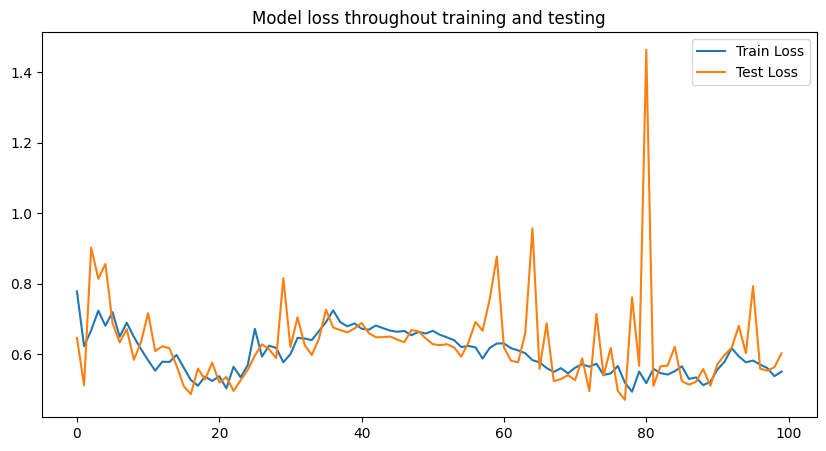

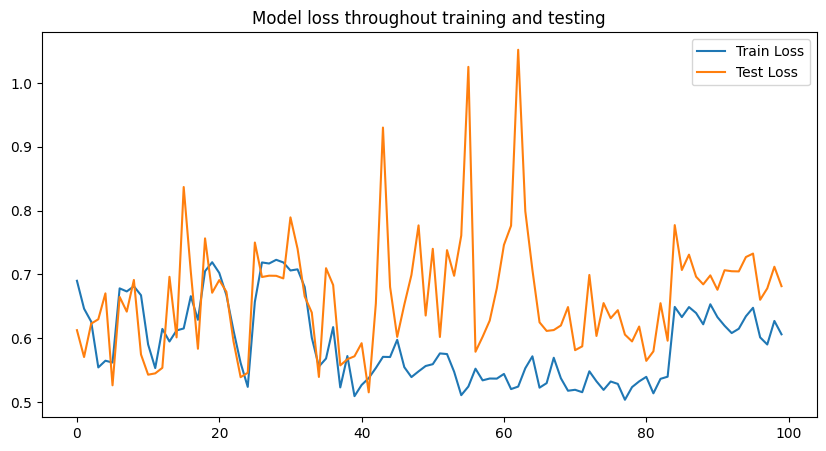

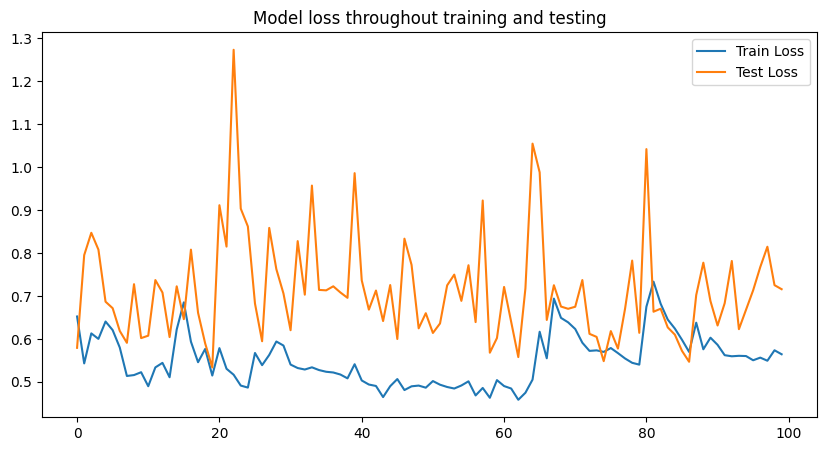

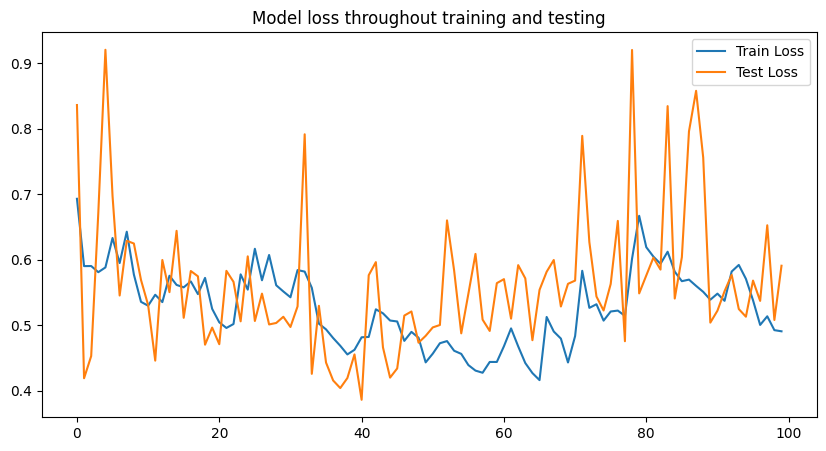

In [103]:
for i,j in zip(LO_tr.keys(),LO_te.keys()):
  plt.figure()
  plt.title("Model loss throughout training and testing")
  plt.plot(LO_tr[i], label="Train Loss")
  plt.plot(LO_te[j], label="Test Loss")
  plt.legend()
  plt.savefig("losses_lstm_{}.jpg".format(i), bbox_inches="tight")

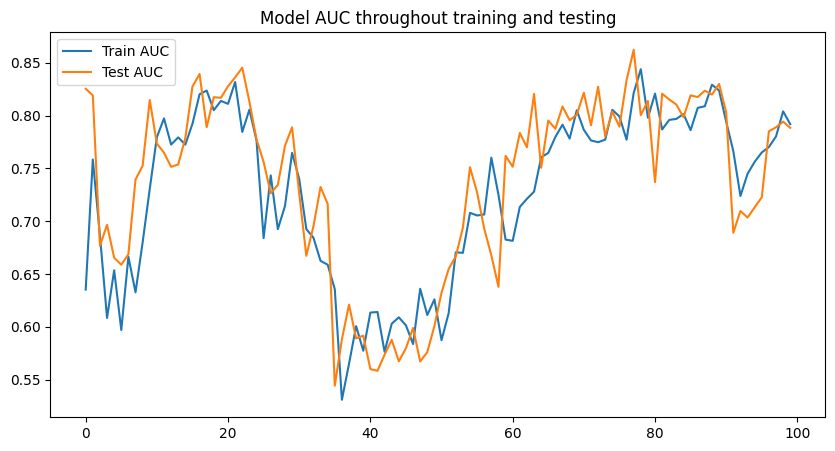

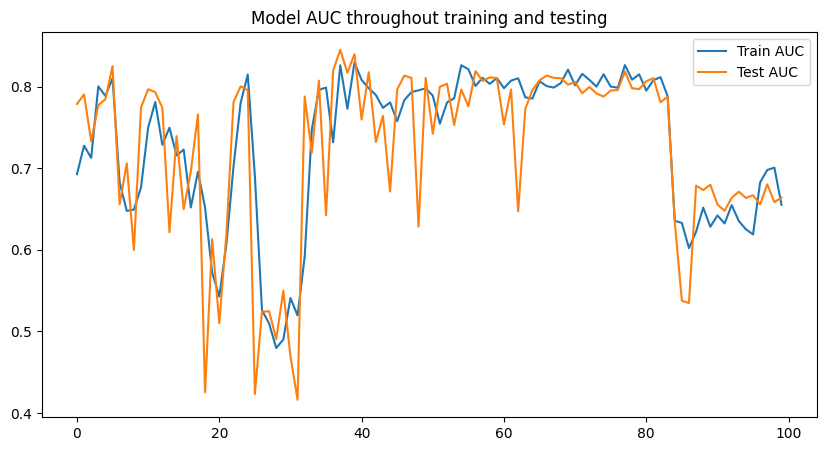

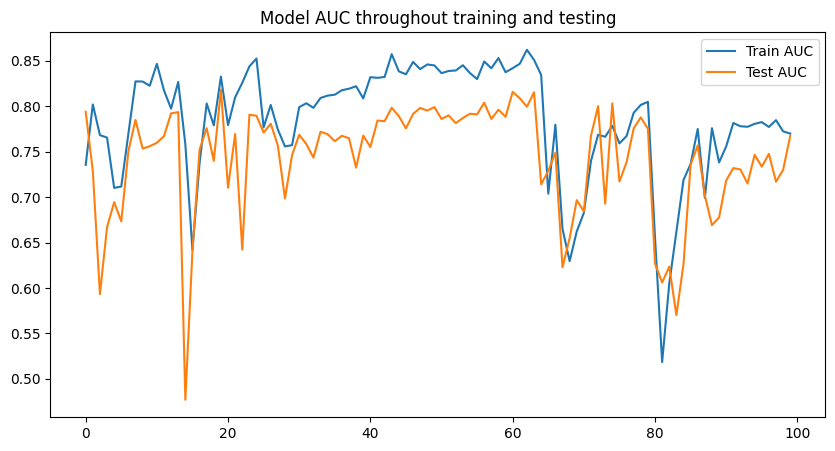

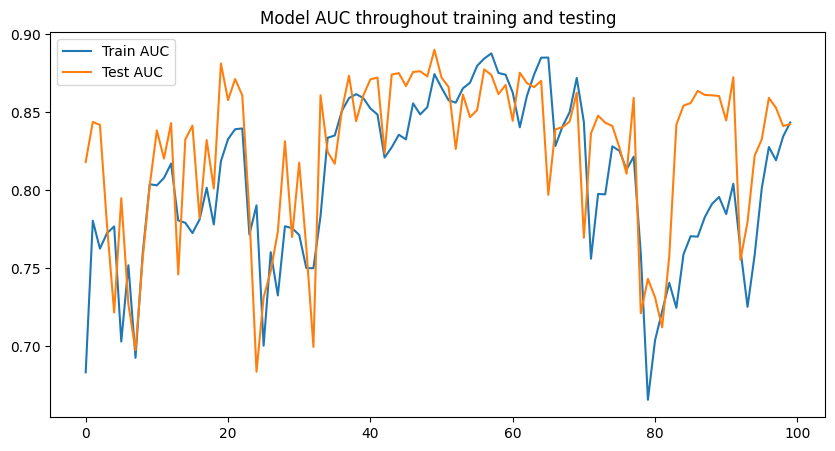

In [104]:
for i,j in zip(TC_tr.keys(),TC_te.keys()):
  plt.figure()
  plt.title("Model AUC throughout training and testing")
  plt.plot(TC_tr[i], label="Train AUC")
  plt.plot(TC_te[i], label="Test AUC")
  plt.legend()
  plt.savefig("aucs_lstm_{}.jpg".format(i), bbox_inches="tight")

In [105]:
print(f"ROC AUC score for train set: {metrics.roc_auc_score(train_epoch_targets, train_epoch_preds):.4f}")
print(f"ROC AUC score for test set: {metrics.roc_auc_score(test_epoch_targets, test_epoch_preds):.4f}")

ROC AUC score for train set: 0.8434
ROC AUC score for test set: 0.8424


In [106]:
print("Train classification metrics")
print(metrics.classification_report(train_epoch_targets, train_epoch_preds >= 0.5))

print("Test classification metrics")
print(metrics.classification_report(test_epoch_targets, test_epoch_preds >= 0.5))

Train classification metrics
              precision    recall  f1-score   support

         0.0       0.75      0.85      0.79       365
         1.0       0.82      0.71      0.76       364

    accuracy                           0.78       729
   macro avg       0.78      0.78      0.78       729
weighted avg       0.78      0.78      0.78       729

Test classification metrics
              precision    recall  f1-score   support

         0.0       0.87      0.72      0.78        81
         1.0       0.65      0.83      0.73        52

    accuracy                           0.76       133
   macro avg       0.76      0.77      0.76       133
weighted avg       0.78      0.76      0.76       133



In [107]:
def plot_confusion_matrix(
        targets: Sequence,
        preds: Sequence,
        split: str
        ):
    """
    Plot and save confusion matrix for provided targets and predictions.

    Args:
        targets (Sequence):
            The true labels for the predictions.
        preds (Sequence):
            Thresholded probabilities produced by the model.
        split (str):
            Split to save the confusion matrix for.
    """

    cm = metrics.confusion_matrix(targets, preds >= 0.5)

    disp_train = metrics.ConfusionMatrixDisplay(cm)
    disp_train.plot()
    plt.savefig(f"cm_{split}_lstm.jpg")

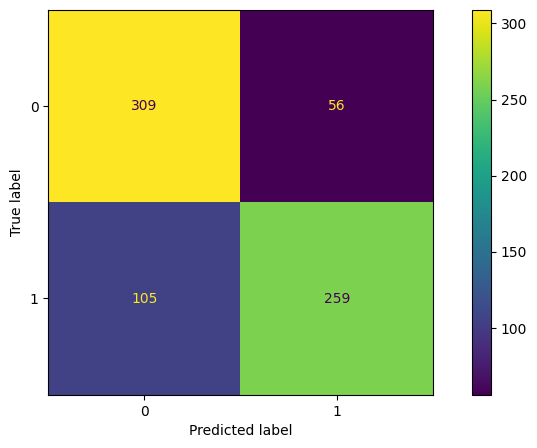

In [108]:
plot_confusion_matrix(
    targets=train_epoch_targets,
    preds=train_epoch_preds,
    split="train")

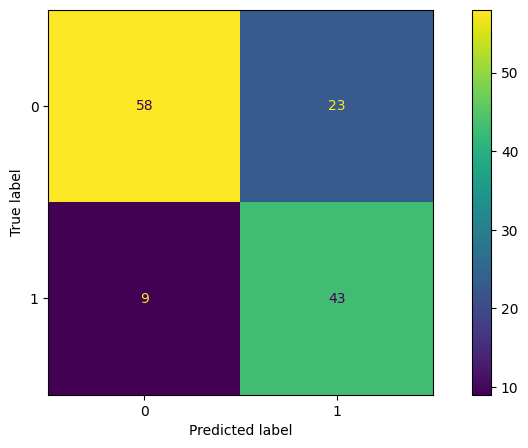

In [109]:
plot_confusion_matrix(
    targets=test_epoch_targets,
    preds=test_epoch_preds,
    split="test")

In [110]:
from zipfile import ZipFile

zipObj = ZipFile('CSVs.zip', 'w')


files = os.listdir('/content')
print(files)
with open("output.txt", "a") as f:
    for i in files:
        if i.endswith('.xlsx') or i.endswith('.csv'):
          zipObj.write(i)

zipObj.close()

zipObj = ZipFile('Images.zip', 'w')


files = os.listdir('/content')
print(files)
with open("output.txt", "a") as f:
    for i in files:
        if i.endswith('.jpg'):
          zipObj.write(i)

zipObj.close()

['.config', 'EVO_resized', 'Frosty_resized', 'model_weights_LSTM3.pth', 'Combo Breaker 2022 - Super Street Fighter II Turbo Top 16 & Top 8_Cropped_resized', 'aucs_lstm_model_check_point3.pth.jpg', 'LSTM_KFold_3.csv', 'CEO 2023_ Day 2_Cropped_resized', 'Genesis_resized', 'LSTM_KFold_4.csv', 'model_weights_LSTM4.pth', 'model_check_point3.pth', 'CSVs.zip', 'losses_lstm_model_check_point1.pth.jpg', 'cm_train_lstm.jpg', 'LSTM_KFold_2.csv', 'Super Street Fighter II X 2022_Cropped_resized', 'model_weights_LSTM1.pth', 'LSTM_KFold_1.csv', 'Makai_resized', 'Ultimate_sheets.xlsx', 'Street Fighter 2 Hyper Fighting Arcade tournament_Cropped_resized', 'Super Street Fighter II  2021_Cropped_resized', 'Super Street Fighter 2 Turbo Tournament @ BIG-ONE_Cropped_resized', 'All10_VITS_new.xlsx', 'model_check_point1.pth', 'cm_test_lstm.jpg', 'model_weights_LSTM2.pth', 'aucs_lstm_model_check_point4.pth.jpg', 'aucs_lstm_model_check_point1.pth.jpg', 'losses_lstm_model_check_point3.pth.jpg', 'model_check_point